<a href="https://colab.research.google.com/github/AnthonySanchez150/CECS456-Project/blob/main/breast_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Breast Cancer Prediction

CECS 456 - Machine Learning

Group #9:
- Phong Cao (Leader)
- Peter Pham
- Jeremy Lin
- Maximillian Gutierrez
- Anthony Sanchez
- John Messina

Due Date: 5-1-23

## Dataset Description
This data set includes 201 instances of one class and 85 instances of another class. The instances are described by 9 attributes, some of which are linear, and some are nominal.
Tasks:
Predict if the patient has breast cancer or not (binary classification problem)
Instructions/Directions:
1.	Perform exploratory data analysis and feature selection 	
2.	Visualization
    - 2.1. Plot the variable distribution using box plot, histogram, and provide a summary of your understanding.  
    - 2.2. Provide an insight on the outcome of correlation matrix   
3.	Perform feature extraction using Principal Component Analysis (PCA). 
4.	Plot the confusion matrix. 
5.	Evaluate the performance metrics of logistic regression, SVM classifier, Naïve Bayes classifier, and Random Forest classifier.  
6.	Plot the relevant graphs, for example ROC, AUC, etc. 
7.	Use Artificial Neural Network (Deep Learning Method) and compare the accuracy with traditional Machine Learning Models. Write down your observations.

Dataset: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer

In [383]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 1. Exploratory Data Analysis

In [384]:
dataset = pd.read_csv('breast-cancer.data')

X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values

## Check For Missing Values

In [385]:
print("Missing values:\n")
print(pd.DataFrame.any(dataset.eq("?")))

Missing values:

class          False
age            False
menopause      False
tumor-size     False
inv-nodes      False
node-caps       True
deg-malig      False
breast         False
breast-quad     True
irradiat       False
dtype: bool


## Data Cleaning

In [386]:
from sklearn.impute import SimpleImputer

si = SimpleImputer(missing_values="?", strategy="most_frequent")
si.fit(X[:,4:])
X[:,4:] = si.transform(X[:,4:])

print("Missing values:\n")
print("node-caps\t",np.any(X[:,4] == "?"))
print("irradiat\t",np.any(X[:,7] == "?"))

Missing values:

node-caps	 False
irradiat	 False


## Encoding

In [387]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

le = LabelEncoder()
X[:,0] = le.fit_transform(X[:,0])
#X[:,1] = le.fit_transform(X[:,1])
X[:,2] = le.fit_transform(X[:,2])
X[:,3] = le.fit_transform(X[:,3])
X[:,4] = le.fit_transform(X[:,4])
X[:,6] = le.fit_transform(X[:,6])
X[:,7] = le.fit_transform(X[:,7])
X[:,8] = le.fit_transform(X[:,8])
y = le.fit_transform(y)

ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1])],remainder="passthrough")
X = np.array(ct.fit_transform(X))

print(X)
print(y)

[[0.0 0.0 1.0 ... 0 1 0]
 [0.0 0.0 1.0 ... 1 4 0]
 [0.0 0.0 1.0 ... 0 1 0]
 ...
 [1.0 0.0 0.0 ... 1 2 0]
 [1.0 0.0 0.0 ... 0 1 0]
 [1.0 0.0 0.0 ... 0 1 0]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


## Train Test Split

In [388]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

## Feature Scaling

In [389]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print(X_train)

[[-0.91581094 -0.13363062  0.9486833  ...  1.08232554 -0.73036435
  -0.56384313]
 [-0.91581094 -0.13363062  0.9486833  ... -0.92393644 -0.73036435
   1.77354294]
 [ 1.09192843 -0.13363062 -1.05409255 ...  1.08232554 -0.73036435
  -0.56384313]
 ...
 [ 1.09192843 -0.13363062 -1.05409255 ... -0.92393644  0.21044397
  -0.56384313]
 [-0.91581094 -0.13363062  0.9486833  ...  1.08232554  0.21044397
  -0.56384313]
 [ 1.09192843 -0.13363062 -1.05409255 ...  1.08232554  2.09206061
  -0.56384313]]


# 2. Visualization

In [390]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
#dataset['class'] = le.fit_transform(dataset['class'])
dataset['age'] = le.fit_transform(dataset['age'])
dataset['menopause'] = le.fit_transform(dataset['menopause'])
dataset['tumor-size'] = le.fit_transform(dataset['tumor-size'])
dataset['inv-nodes'] = le.fit_transform(dataset['inv-nodes'])
dataset['node-caps'] = le.fit_transform(dataset['node-caps'])
#dataset['deg-malig'] = le.fit_transform(dataset['deg-malig'])
dataset['breast'] = le.fit_transform(dataset['breast'])
dataset['breast-quad'] = le.fit_transform(dataset['breast-quad'])
dataset['irradiat'] = le.fit_transform(dataset['irradiat'])

dataset['class'] = le.fit_transform(dataset['class'])

## Box Plot

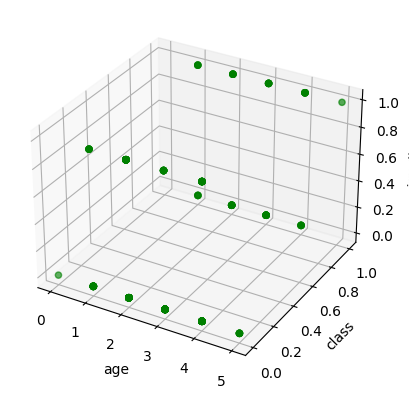

In [391]:
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(dataset["age"], dataset["class"],dataset["irradiat"], color = "green")
ax.set_xlabel('age')
ax.set_ylabel('class')
ax.set_zlabel('irradiat')
#plt.plot(dataset["age"], dataset["class"],dataset["irradiat"], "ro")
plt.show()

## Histograph

Text(0.5, 0, 'Age')

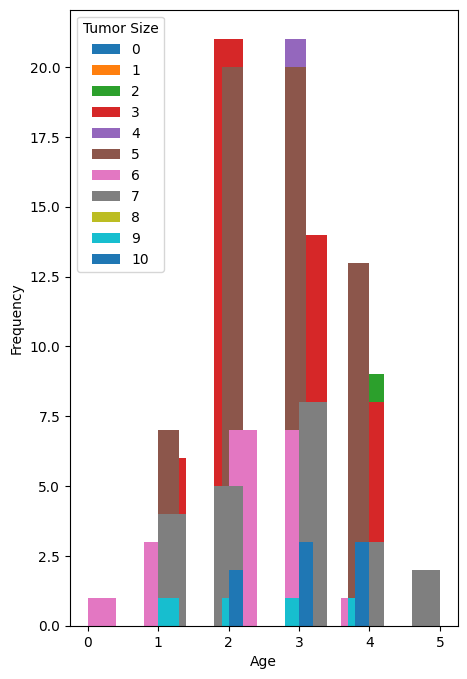

In [392]:
df = dataset.groupby('tumor-size')['age'].plot(kind='hist', figsize=(5, 8))

plt.legend(title='Tumor Size')
# Add x-axis label
plt.xlabel('Age')

Text(0.5, 0, 'Age')

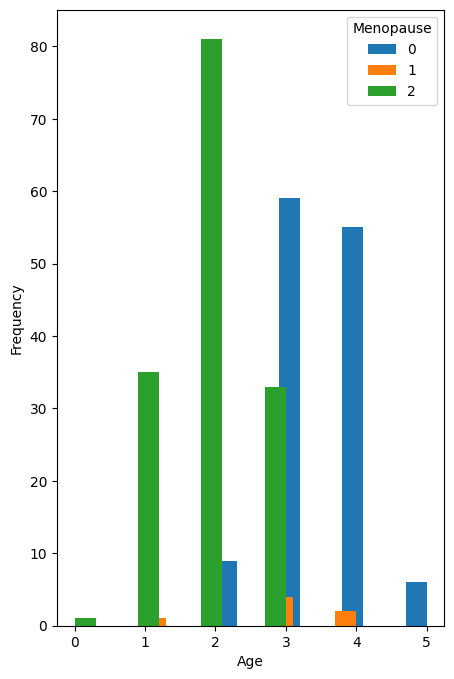

In [393]:
df = dataset.groupby('menopause')['age'].plot(kind='hist', figsize=(5, 8))

plt.legend(title='Menopause')
# Add x-axis label
plt.xlabel('Age')


## Correlation Matrix

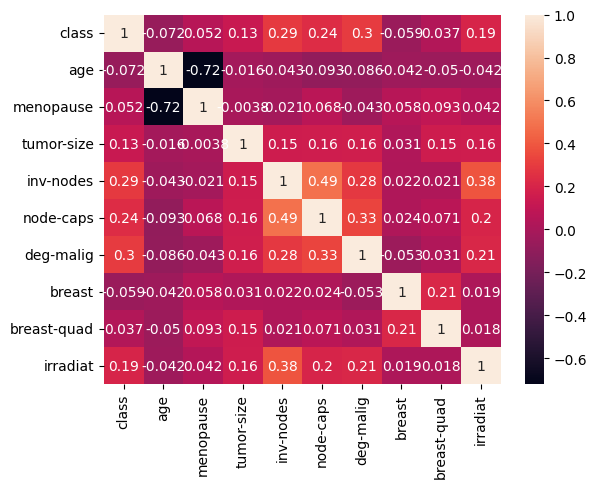

In [394]:
import seaborn as sn
import matplotlib.pyplot as plt

corr_matrix = dataset.corr(numeric_only = True)
sn.heatmap(corr_matrix, annot=True)
plt.show()

# 3. Principal Component Analysis
Used different n/k values and decided on n = 9 as it provided the best results.

In [395]:
from sklearn.decomposition import PCA

X_train_no_PCA = X_train
X_test_no_PCA = X_test

pca = PCA(n_components=9)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# LogisticRegression: 0.6724 with 2 components
# SVC linear: 0.7241 with 8 components
# SVC kernel: 0.6897 with 3 components
# GaussianNB: 0.6724 with 2 components
# BernoulliNB: 0.7069 with 4 components
# RandomForestClassifier: 0.7931 with 9 components
# ArtificalNeuralNetwork: 0.7241 with 3 components

# 4. Confusion Matrix

See section below

# 5. Performance Metrics

In [396]:
from sklearn import metrics

## Logistic Regression

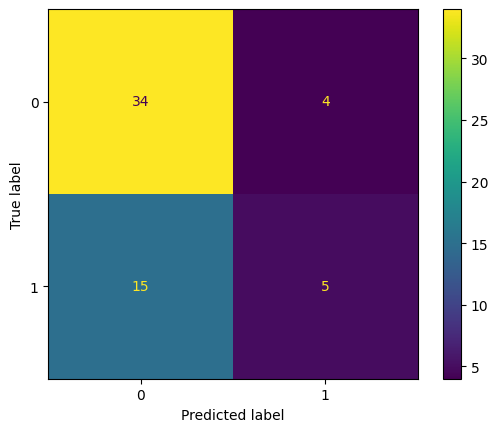

Accuracy:  0.6724137931034483


In [397]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)

from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
y_pred = classifier.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

plt.show()
print("Accuracy: ",accuracy_score(y_test,y_pred))

### ROC

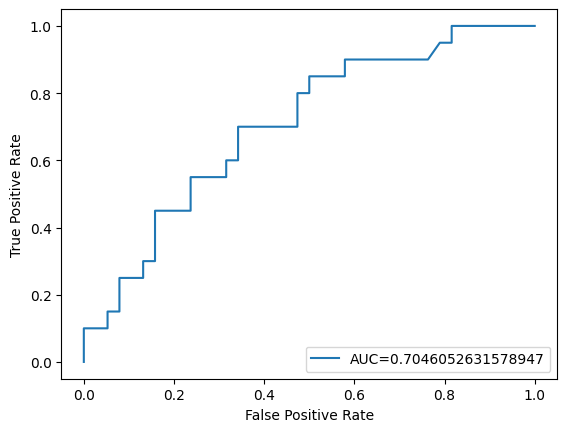

In [398]:
y_pred_proba = classifier.predict_proba(X_test)[::,1]

fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## Support Vector Machine
Implemented two different kernel techniques:
- Linear
- Radial basis function (RBF)

RBF provided better results in regard to accuracy score.

### Linear

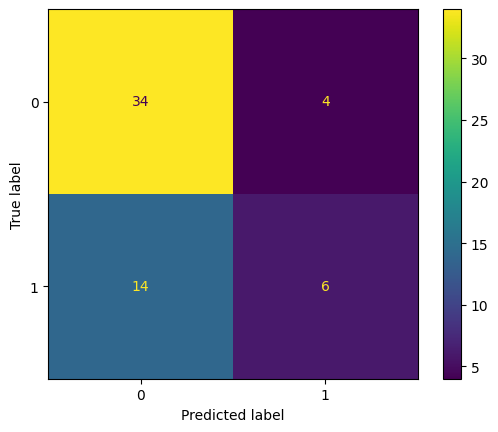

Accuracy:  0.6896551724137931


In [399]:
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', random_state = 0, probability=True)
svc.fit(X_train,y_train)

y_pred = svc.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

plt.show()
print("Accuracy: ",accuracy_score(y_test,y_pred))

### ROC

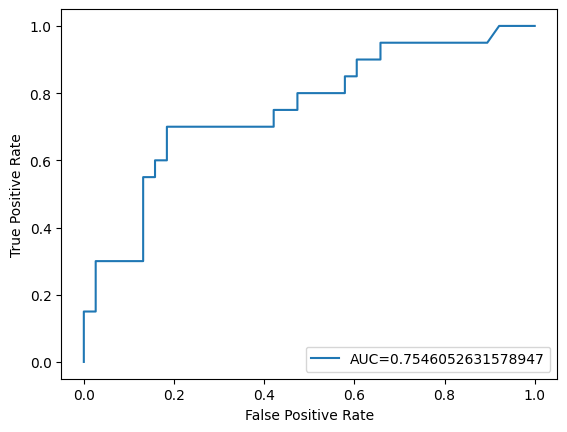

In [400]:
y_pred_proba = svc.predict_proba(X_test)[::,1]

fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

### Radial basis function (RBF)

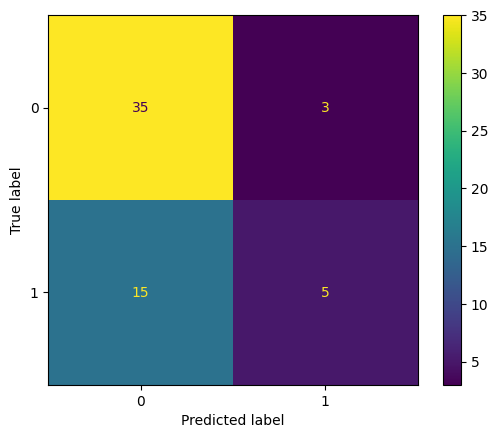

Accuracy:  0.6896551724137931


In [401]:
from sklearn.svm import SVC
svc = SVC(kernel = 'rbf', random_state = 0, probability=True)
svc.fit(X_train,y_train)

y_pred = svc.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

plt.show()
print("Accuracy: ",accuracy_score(y_test,y_pred))

### ROC

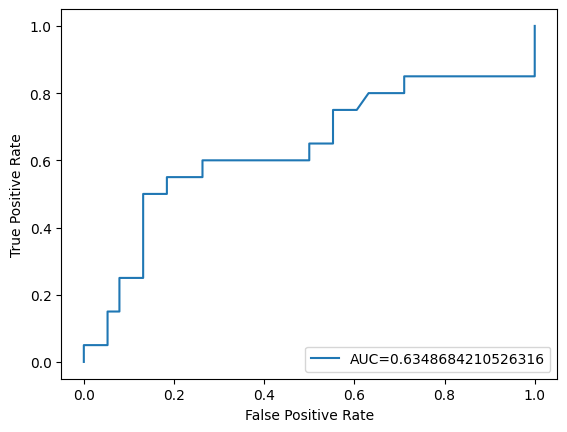

In [402]:
y_pred_proba = svc.predict_proba(X_test)[::,1]

fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## Naive Bayes Classifier
Implemented two NB classifier types:
- Gaussian
- Bernoulli

Bernoulli performed better given that Gaussian works best with Gaussian distributed datasets, which this isnt.

### Gaussian

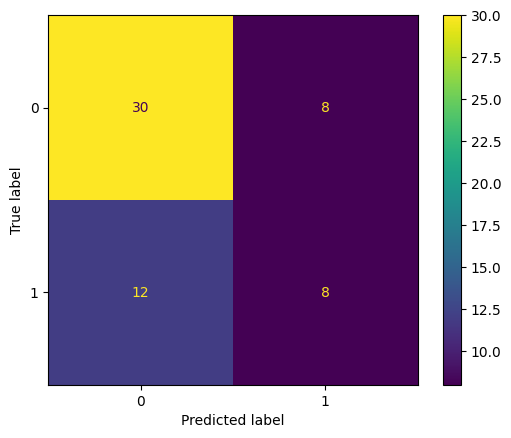

Accuracy:  0.6551724137931034


In [403]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)

y_pred = gnb.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

plt.show()
print("Accuracy: ",accuracy_score(y_test,y_pred))

### ROC

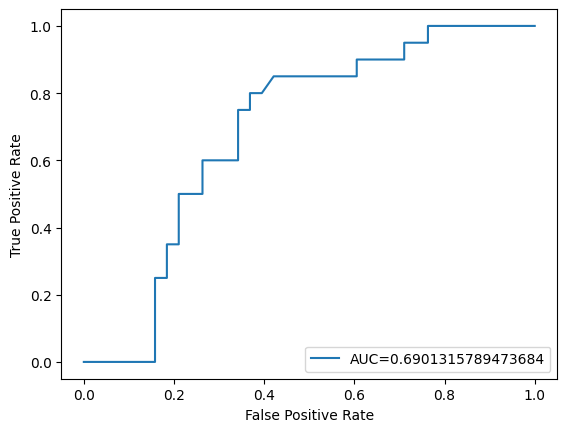

In [404]:
y_pred_proba = gnb.predict_proba(X_test)[::,1]

fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

### Bernoulli

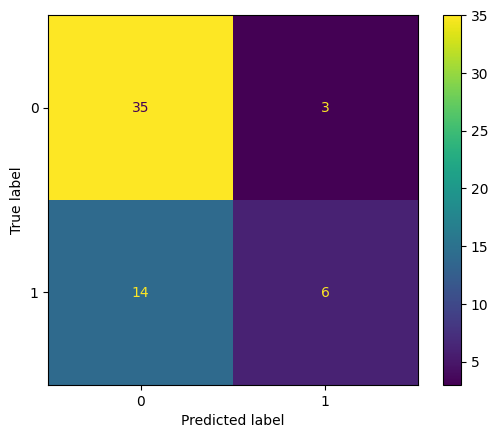

Accuracy:  0.7068965517241379


In [405]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(X_train,y_train)

y_pred = bnb.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

plt.show()
print("Accuracy: ",accuracy_score(y_test,y_pred))

### ROC

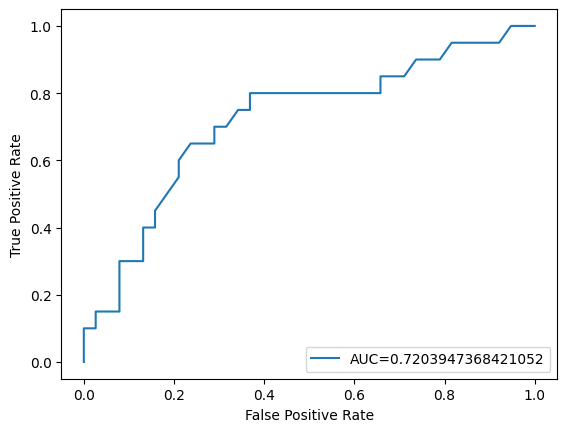

In [406]:
y_pred_proba = bnb.predict_proba(X_test)[::,1]

fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## Random Forest

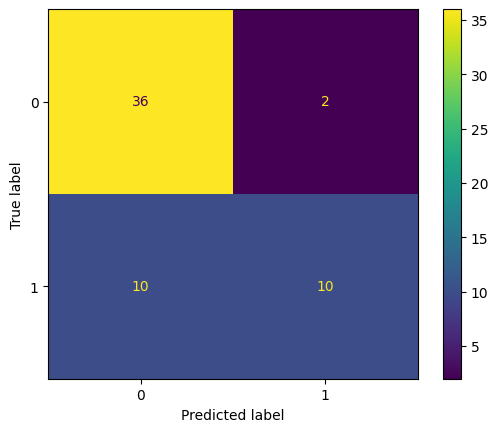

Accuracy:  0.7931034482758621


In [407]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rfc.fit(X_train,y_train)

y_pred = rfc.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

plt.show()
print("Accuracy: ",accuracy_score(y_test,y_pred))

### ROC

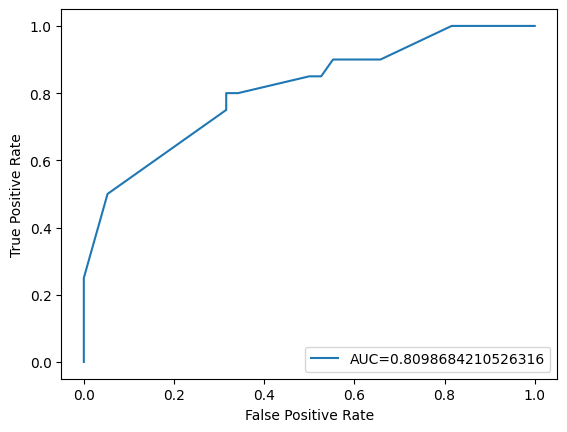

In [408]:
y_pred_proba = rfc.predict_proba(X_test)[::,1]

fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# 7. ANN
Artificial neural network with 3 layers:
- First layer with 32 units.
- Second layer with 16 units. 
- Output layer with 1 unit.

Trained with 200 epoch, batch size 64. This provided more consistant results than other combinations we tried.

Epoch 1/200
4/4 [==============================] - 1s 2ms/step - loss: 0.7724 - accuracy: 0.4211
Epoch 2/200
4/4 [==============================] - 0s 2ms/step - loss: 0.7465 - accuracy: 0.4605
Epoch 3/200
4/4 [==============================] - 0s 2ms/step - loss: 0.7258 - accuracy: 0.4693
Epoch 4/200
4/4 [==============================] - 0s 2ms/step - loss: 0.7059 - accuracy: 0.5088
Epoch 5/200
4/4 [==============================] - 0s 2ms/step - loss: 0.6901 - accuracy: 0.5088
Epoch 6/200
4/4 [==============================] - 0s 2ms/step - loss: 0.6751 - accuracy: 0.5658
Epoch 7/200
4/4 [==============================] - 0s 2ms/step - loss: 0.6624 - accuracy: 0.6184
Epoch 8/200
4/4 [==============================] - 0s 2ms/step - loss: 0.6507 - accuracy: 0.6272
Epoch 9/200
4/4 [==============================] - 0s 2ms/step - loss: 0.6410 - accuracy: 0.6798
Epoch 10/200
4/4 [==============================] - 0s 2ms/step - loss: 0.6310 - accuracy: 0.6974
Epoch 11/200
4/4 [===========

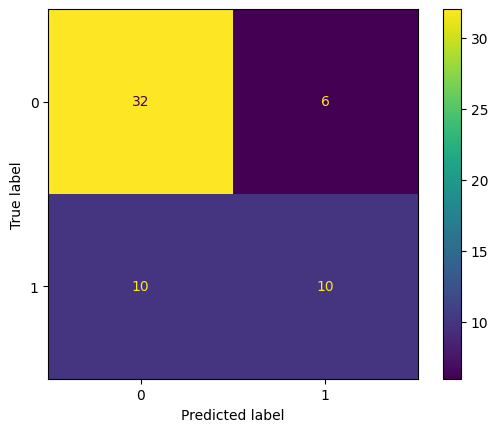

Accuracy:  0.7241379310344828


In [409]:
import tensorflow as tf
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=32, activation="relu"))
ann.add(tf.keras.layers.Dense(units=16, activation="relu"))
#ann.add(tf.keras.layers.Dense(units=9, activation="relu"))
#ann.add(tf.keras.layers.Dense(units=12, activation="relu"))
#ann.add(tf.keras.layers.Dense(units=12, activation="relu"))
ann.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
ann.compile(optimizer="adam",loss='binary_crossentropy',metrics=["accuracy"])
ann.fit(X_train, y_train, epochs=200, batch_size=64)


y_pred = ann.predict(X_test)
y_pred = (y_pred>0.5)
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

plt.show()
print("Accuracy: ",accuracy_score(y_test,y_pred))

# Best Accuracy And PCA Components For Each Model

In [410]:
# returns model associated with given number
def getModel(num):
    if num == 0:
        return LogisticRegression(random_state=0)
    elif num == 1:
        return SVC(kernel = 'linear', random_state = 0)
    elif num == 2:
        return SVC(kernel = 'rbf', random_state = 0)
    elif num == 3:
        return GaussianNB()
    elif num == 4:
        return BernoulliNB()
    elif num == 5:
        return RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
    else:
        ann = tf.keras.models.Sequential()
        ann.add(tf.keras.layers.Dense(units=32, activation="relu"))
        ann.add(tf.keras.layers.Dense(units=16, activation="relu"))
        ann.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
        ann.compile(optimizer="adam",loss='binary_crossentropy',metrics=["accuracy"])
        return ann

# returns model name associated with given number
def getModelName(num):
    if num == 0:
        return "LogisticRegression"
    elif num == 1:
        return "SVC linear"
    elif num == 2:
        return "SVC kernel"
    elif num == 3:
        return "GaussianNB"
    elif num == 4:
        return "BernoulliNB"
    elif num == 5:
        return "RandomForestClassifier"
    else:
        return "ArtificalNeuralNetwork"

# returns best accuracy associated with given model number
def getBestAccuracy(num):
    accuracy = []
    for i in range(9):
        # make copy of X before PCA
        X_train_copy = X_train_no_PCA
        X_test_copy = X_test_no_PCA
        # implement PCA with i components on X
        pca = PCA(n_components=i + 1)
        X_train_copy = pca.fit_transform(X_train_copy)
        X_test_copy = pca.transform(X_test_copy)
        # fit model and get prediction
        model = getModel(num)
        y_pred = []
        if num == 6:
            model.fit(X_train_copy, y_train, epochs=200, batch_size=64, verbose=0)
            y_pred = model.predict(X_test_copy, verbose=0)
            y_pred = (y_pred>0.5)
        else:
            model.fit(X_train_copy,y_train)
            y_pred = model.predict(X_test_copy)
        # store accuracy
        accuracy.append(accuracy_score(y_test,y_pred))

    # calculate max accuracy
    max = 0
    components = 0
    for i in range(len(accuracy)):
        if accuracy[i] > max:
            max = accuracy[i]
            components = i + 1
    
    return [getModelName(num),max,components]

# print max accuracy and optimal number of components used with PCA for each model
print("Best accuracy and PCA components:\n")
for i in range(7):
    bestAccuracy = getBestAccuracy(i)
    print(bestAccuracy[0] + ":",round(bestAccuracy[1],4),"with",bestAccuracy[2],"components")


Best accuracy and PCA components:

LogisticRegression: 0.6724 with 2 components
SVC linear: 0.7241 with 8 components
SVC kernel: 0.6897 with 3 components
GaussianNB: 0.6724 with 2 components
BernoulliNB: 0.7069 with 4 components
RandomForestClassifier: 0.7931 with 9 components
ArtificalNeuralNetwork: 0.7414 with 7 components
